In [39]:
import pandas as pd
from prophet import Prophet # Carregando a biblioca/modulos
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  # Required for displaying the plot
from prophet.plot import plot

In [40]:
# Dados de exemplo
dolar = {
    'data': pd.date_range(start='2025-06-18', periods=16, freq='D'),  # 16 dias consecutivos
    'cotacao': [
        5.7238,
        5.7237,
        5.7300,
        5.7497,
        5.7497,
        5.7497,
        5.7902,
        5.8198,
        5.7685,
        5.7974,
        5.7705,
        5.7705,
        5.7705,
        5.7623,
        5.7623,
        5.7512
    ]  # cotação diária Real/Dólar
}
print(f"\n\n Dados: \n\n\t{dolar} \n\n")

df = pd.DataFrame(dolar)



 Dados: 

	{'data': DatetimeIndex(['2025-06-18', '2025-06-19', '2025-06-20', '2025-06-21',
               '2025-06-22', '2025-06-23', '2025-06-24', '2025-06-25',
               '2025-06-26', '2025-06-27', '2025-06-28', '2025-06-29',
               '2025-06-30', '2025-07-01', '2025-07-02', '2025-07-03'],
              dtype='datetime64[ns]', freq='D'), 'cotacao': [5.7238, 5.7237, 5.73, 5.7497, 5.7497, 5.7497, 5.7902, 5.8198, 5.7685, 5.7974, 5.7705, 5.7705, 5.7705, 5.7623, 5.7623, 5.7512]} 




In [41]:
print(f"\nDataset \n\n")
df.info()


Dataset 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     16 non-null     datetime64[ns]
 1   cotacao  16 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 384.0 bytes


In [42]:
# Renomear colunas para o formato exigido pelo Prophet
df_prophet = df.rename(columns={'data': 'ds', 'cotacao': 'y'})

# Criar e treinar o modelo
model = Prophet()
model.fit(df_prophet)

19:38:26 - cmdstanpy - INFO - Chain [1] start processing
19:38:29 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Criar datas futuras (10 dias a mais)
future = model.make_future_dataframe(periods=10)
future.info()
future.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      26 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 336.0 bytes


,ds
16,2025-07-04
17,2025-07-05
18,2025-07-06
19,2025-07-07
20,2025-07-08
21,2025-07-09
22,2025-07-10
23,2025-07-11
24,2025-07-12
25,2025-07-13


In [44]:
# Gerar previsões
forecast = model.predict(future)
forecast.info ()
forecast.head (16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          26 non-null     datetime64[ns]
 1   trend                       26 non-null     float64       
 2   yhat_lower                  26 non-null     float64       
 3   yhat_upper                  26 non-null     float64       
 4   trend_lower                 26 non-null     float64       
 5   trend_upper                 26 non-null     float64       
 6   additive_terms              26 non-null     float64       
 7   additive_terms_lower        26 non-null     float64       
 8   additive_terms_upper        26 non-null     float64       
 9   weekly                      26 non-null     float64       
 10  weekly_lower                26 non-null     float64       
 11  weekly_upper                26 non-null     float64       
 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-06-18,5.721312,5.723801,5.723801,5.721312,5.721312,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.0,0.0,0.0,5.723801
1,2025-06-19,5.731895,5.723701,5.723701,5.731895,5.731895,-0.008193,-0.008193,-0.008193,-0.008193,-0.008193,-0.008193,0.0,0.0,0.0,5.723701
2,2025-06-20,5.741887,5.730001,5.730001,5.741887,5.741887,-0.011886,-0.011886,-0.011886,-0.011886,-0.011886,-0.011886,0.0,0.0,0.0,5.730001
3,2025-06-21,5.753480,5.749701,5.749701,5.753480,5.753480,-0.003779,-0.003779,-0.003779,-0.003779,-0.003779,-0.003779,0.0,0.0,0.0,5.749701
4,2025-06-22,5.740262,5.749701,5.749701,5.740262,5.740262,0.009439,0.009439,0.009439,0.009439,0.009439,0.009439,0.0,0.0,0.0,5.749701
5,2025-06-23,5.739845,5.749701,5.749701,5.739845,5.739845,0.009856,0.009856,0.009856,0.009856,0.009856,0.009856,0.0,0.0,0.0,5.749701
6,2025-06-24,5.788128,5.790201,5.790201,5.788128,5.788128,0.002073,0.002073,0.002073,0.002073,0.002073,0.002073,0.0,0.0,0.0,5.790201
7,2025-06-25,5.817312,5.819801,5.819801,5.817312,5.817312,0.002490,0.002490,0.002490,0.002490,0.002490,0.002490,0.0,0.0,0.0,5.819801
8,2025-06-26,5.776695,5.768502,5.768502,5.776695,5.776695,-0.008193,-0.008193,-0.008193,-0.008193,-0.008193,-0.008193,0.0,0.0,0.0,5.768502
9,2025-06-27,5.809287,5.797401,5.797401,5.809287,5.809287,-0.011886,-0.011886,-0.011886,-0.011886,-0.011886,-0.011886,0.0,0.0,0.0,5.797401


In [45]:
print("=== Previsao ===")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

=== Previsao ===
           ds      yhat  yhat_lower  yhat_upper
0  2025-06-18  5.723801    5.723801    5.723801
1  2025-06-19  5.723701    5.723701    5.723701
2  2025-06-20  5.730001    5.730001    5.730001
3  2025-06-21  5.749701    5.749701    5.749701
4  2025-06-22  5.749701    5.749701    5.749701
5  2025-06-23  5.749701    5.749701    5.749701
6  2025-06-24  5.790201    5.790201    5.790201
7  2025-06-25  5.819801    5.819801    5.819801
8  2025-06-26  5.768502    5.768502    5.768502
9  2025-06-27  5.797401    5.797401    5.797401
10 2025-06-28  5.770501    5.770501    5.770501
11 2025-06-29  5.770501    5.770501    5.770501
12 2025-06-30  5.770501    5.770501    5.770501
13 2025-07-01  5.762301    5.762301    5.762301
14 2025-07-02  5.762301    5.762301    5.762301
15 2025-07-03  5.751201    5.751201    5.751201
16 2025-07-04  5.747092    5.728569    5.769163
17 2025-07-05  5.754781    5.693224    5.827764
18 2025-07-06  5.767583    5.640659    5.910042
19 2025-07-07  5.767583

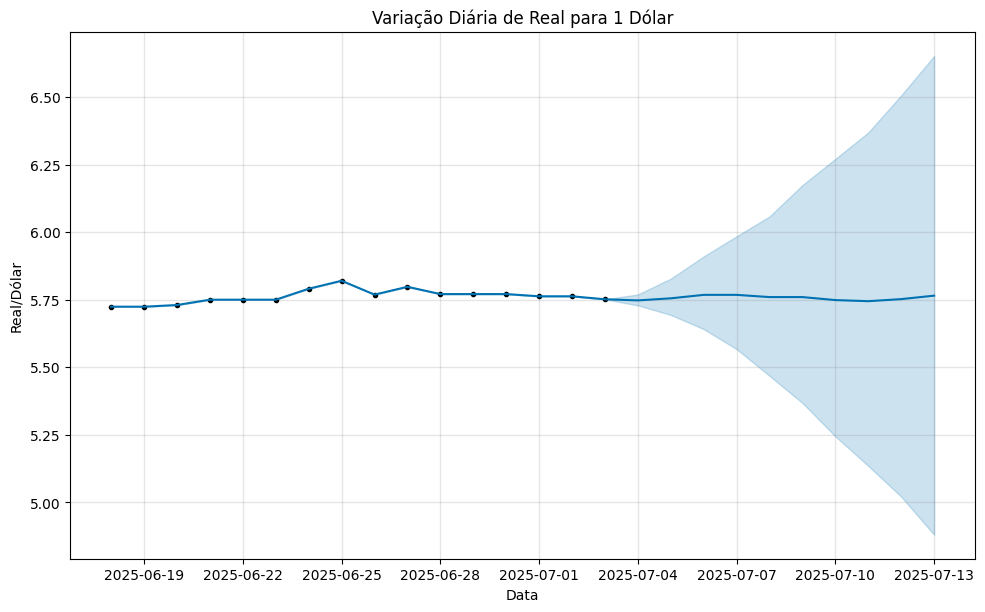

In [51]:
# Generate the plot
fig = plot(model, forecast)
plt.title("Variação Diária de Real para 1 Dólar")
plt.xlabel("Data")
plt.ylabel("Real/Dólar")
plt.show()